## Overview:

Houston COVID data needs to be formatted and analyzed to rank the Houston zip codes by COVID positivity rate. 

"Provider" and "Physician" columns have been scrambled.

## Ingest the Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from PIL import Image 

In [3]:
# read the dataset "out.csv"
df = pd.read_csv('out.csv')

In [5]:
# data overview 
df.head()

,P_ID,P_ZIP,Provider,Physician,Result,CollDate,P_RACE,P_GENDER,P_HOSP
0,EP68915,77003,gF1,yYn,POSITIVE,2021-09-25,Native Hawaiian or Pacific Islander,M,F
1,Lg39984,77007,bP34,ubb,NEGATIVE,2021-09-26,More than one race,M,F
2,FJ67394,77001,Ro48,owo,POSITIVE,2021-09-08,White,M,F
3,hV48848,77008,GB32,vUT,POSITIVE,2021-09-21,Asian,M,F
4,cE87201,77016,zA42,pVZ,NEGATIVE,2021-09-13,White,F,F


In [6]:
df.shape

(5000, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   P_ID       5000 non-null   object
 1   P_ZIP      5000 non-null   int64 
 2   Provider   5000 non-null   object
 3   Physician  5000 non-null   object
 4   Result     5000 non-null   object
 5   CollDate   5000 non-null   object
 6   P_RACE     5000 non-null   object
 7   P_GENDER   5000 non-null   object
 8   P_HOSP     5000 non-null   object
dtypes: int64(1), object(8)
memory usage: 351.7+ KB


In [8]:
df.isnull().sum()

P_ID         0
P_ZIP        0
Provider     0
Physician    0
Result       0
CollDate     0
P_RACE       0
P_GENDER     0
P_HOSP       0
dtype: int64

In [9]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
P_ZIP,5000.0,77007.6842,5.446687,77001.0,77003.0,77007.0,77009.0,77020.0


In [18]:
df['P_ZIP'].value_counts()

77001    455
77008    440
77009    437
77012    435
77003    424
77007    416
77006    414
77016    400
77005    397
77002    396
77020    394
77004    392
Name: P_ZIP, dtype: int64

In [11]:
df['Result'].value_counts()

NEGATIVE    2561
POSITIVE    2439
Name: Result, dtype: int64

In [12]:
df['CollDate'].value_counts()

2021-09-03    224
2021-09-08    190
2021-09-17    188
2021-09-13    185
2021-09-02    179
2021-09-25    177
2021-09-07    176
2021-09-14    176
2021-09-05    170
2021-09-27    169
2021-09-26    167
2021-09-12    167
2021-09-23    166
2021-09-09    166
2021-09-11    165
2021-09-15    164
2021-09-10    162
2021-09-19    161
2021-09-22    160
2021-09-01    160
2021-09-16    160
2021-09-24    159
2021-09-21    157
2021-09-30    156
2021-09-28    156
2021-09-20    153
2021-09-06    149
2021-09-04    149
2021-09-29    148
2021-09-18    141
Name: CollDate, dtype: int64

In [13]:
df['P_RACE'].value_counts()

More than one race                     849
White                                  847
American Indian or Alaska Native       846
Native Hawaiian or Pacific Islander    830
Asian                                  820
Black or African American              808
Name: P_RACE, dtype: int64

In [14]:
df['P_GENDER'].value_counts()

M    2542
F    2458
Name: P_GENDER, dtype: int64

In [16]:
df['P_HOSP'].value_counts()

T    2509
F    2491
Name: P_HOSP, dtype: int64

## Number of positives and negatives per zip code 

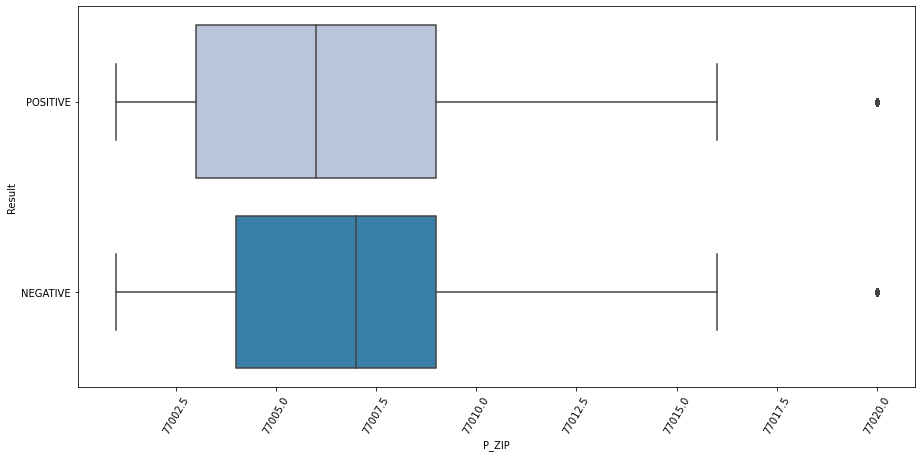

In [4]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "P_ZIP", y = "Result", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

## Positivity rate per zip code

## Write results to a file 